This file processes and visualizes export data for Morocco for the products: tomatoes, lemons, and melons.
It includes steps to reshape the data, calculate total exports, compute export percentages, and create various visualizations.

Products:
1. Tomatoes
2. Lemons
3. Melons


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

 Load the data from a CSV file


In [2]:
data_pays = pd.read_csv("Data_intermediate\exports_pays.csv", delimiter=',')

In [3]:
data_pays.head()

,produit,pays,valeur_2000,valeur_2001,valeur_2002,valeur_2003,valeur_2004,valeur_2005,valeur_2006,valeur_2007,...,poids_2014,poids_2015,poids_2016,poids_2017,poids_2018,poids_2019,poids_2020,poids_2021,poids_2022,poids_2023
0,CITRON,AFRIQUE DU SUD,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,9000.0,0.00
1,CITRON,ALGERIE,0,0,0,0,0,0,0,0,...,0.0,0.0,20000.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
2,CITRON,ALLEMAGNE,0,0,165,0,0,0,0,1390,...,11630.0,0.0,59.0,119.9,30.9,20471.77,27709.78,33025.0,91.0,145.75
3,CITRON,ANGOLA,0,0,0,0,0,0,0,0,...,24930.0,46890.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
4,CITRON,ARABIE SAOUDITE,0,0,0,180,0,0,0,0,...,86985.0,418743.0,1029460.0,1109526.0,23222.0,714760.00,275507.00,144719.0,24050.0,0.00


In [4]:
data_pays.describe()

,valeur_2000,valeur_2001,valeur_2002,valeur_2003,valeur_2004,valeur_2005,valeur_2006,valeur_2007,valeur_2008,valeur_2009,...,poids_2014,poids_2015,poids_2016,poids_2017,poids_2018,poids_2019,poids_2020,poids_2021,poids_2022,poids_2023
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,...,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,7.331301e+05,7.082175e+05,9.156801e+05,8.222065e+05,1.237090e+06,1.673170e+06,1.916504e+06,2.663313e+06,2.980753e+06,3.119384e+06,...,2.496767e+05,2.288261e+05,2.416448e+05,3.366653e+05,3.449175e+05,3.270674e+05,3.631056e+05,3.184107e+05,2.722347e+05,3.129454e+05
std,5.793533e+06,7.012582e+06,7.295946e+06,6.570910e+06,1.077442e+07,1.520024e+07,1.902421e+07,2.510846e+07,2.659768e+07,3.212254e+07,...,2.263876e+06,2.096289e+06,2.170912e+06,2.937864e+06,2.661008e+06,2.552871e+06,2.738298e+06,2.535363e+06,2.215660e+06,2.654763e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.950000e+01,0.000000e+00,...,3.115000e+01,1.386000e+03,1.350000e+03,1.323750e+03,4.912250e+03,2.750872e+03,6.790500e+03,2.020243e+03,4.511500e+03,6.464500e+02
max,7.006252e+07,9.940050e+07,9.815735e+07,8.993422e+07,1.464899e+08,2.143569e+08,2.734243e+08,3.592561e+08,3.822228e+08,4.665424e+08,...,3.193465e+07,3.011610e+07,3.108445e+07,4.165577e+07,3.603361e+07,3.580706e+07,3.790576e+07,3.559605e+07,3.153660e+07,3.609744e+07


This script calculates the total export values for each product and year, and then determines the export shares for each country.
It filters out the countries where the export share is greater than 5% for any year from 2000 to 2023.

In [6]:
# This script calculates the total export values for each product and year, and then determines the export shares for each country.
# It filters out the countries where the export share is greater than 5% for any year from 2000 to 2023.

# Calculate the total exports for each product and each year
total_exports = data_pays.groupby('produit').sum()

# Initialize a DataFrame for the filtered results
filtered_countries = pd.DataFrame()

# Loop through each product and each year to calculate the export shares
for product in data_pays['produit'].unique():
    product_data = data_pays[data_pays['produit'] == product].copy()
    
    for year in range(2000, 2024):
        value_col = f'valeur_{year}'
        if value_col in product_data.columns:
            total_export = total_exports.at[product, value_col]
            if total_export > 0:
                # Calculate the export shares as a percentage
                product_data[value_col] = product_data[value_col] / total_export * 100

    # Check and filter the columns that exist in the product_data DataFrame
    existing_columns = [f'valeur_{year}' for year in range(2000, 2024) if f'valeur_{year}' in product_data.columns]
    if existing_columns:
        # Filter the countries where the export share is greater than 5% for any given year
        filtered_data = product_data[(product_data[existing_columns] > 5).any(axis=1)]
        filtered_countries = pd.concat([filtered_countries, filtered_data])

# Reorganize the columns to include only the export values in percentage
filtered_countries = filtered_countries[['produit', 'pays'] + existing_columns].drop_duplicates()


In [8]:
# Afficher le DataFrame filtré
print(filtered_countries.head())

   produit                 pays  valeur_2000  valeur_2001  valeur_2002  \
4   CITRON      ARABIE SAOUDITE          0.0     0.000000     0.000000   
16  CITRON               CANADA          0.0     0.016776     0.000000   
21  CITRON        COTE D'IVOIRE          0.0     4.313874     4.721266   
22  CITRON               EGYPTE          0.0     0.000000     0.000000   
23  CITRON  EMIRATS ARABES UNIS          0.0     0.000000     0.180696   

    valeur_2003  valeur_2004  valeur_2005  valeur_2006  valeur_2007  ...  \
4      0.118978          0.0     0.000000     0.000000     0.000000  ...   
16     0.000000          0.0     0.000000     0.000000     1.846268  ...   
21    13.087621          0.0     1.892499     0.000000     0.000000  ...   
22     0.000000          0.0    23.993853     0.000000     0.000000  ...   
23     0.000000          0.0     0.000000     0.288096     0.000000  ...   

    valeur_2014  valeur_2015  valeur_2016  valeur_2017  valeur_2018  \
4      1.800490     6.99637

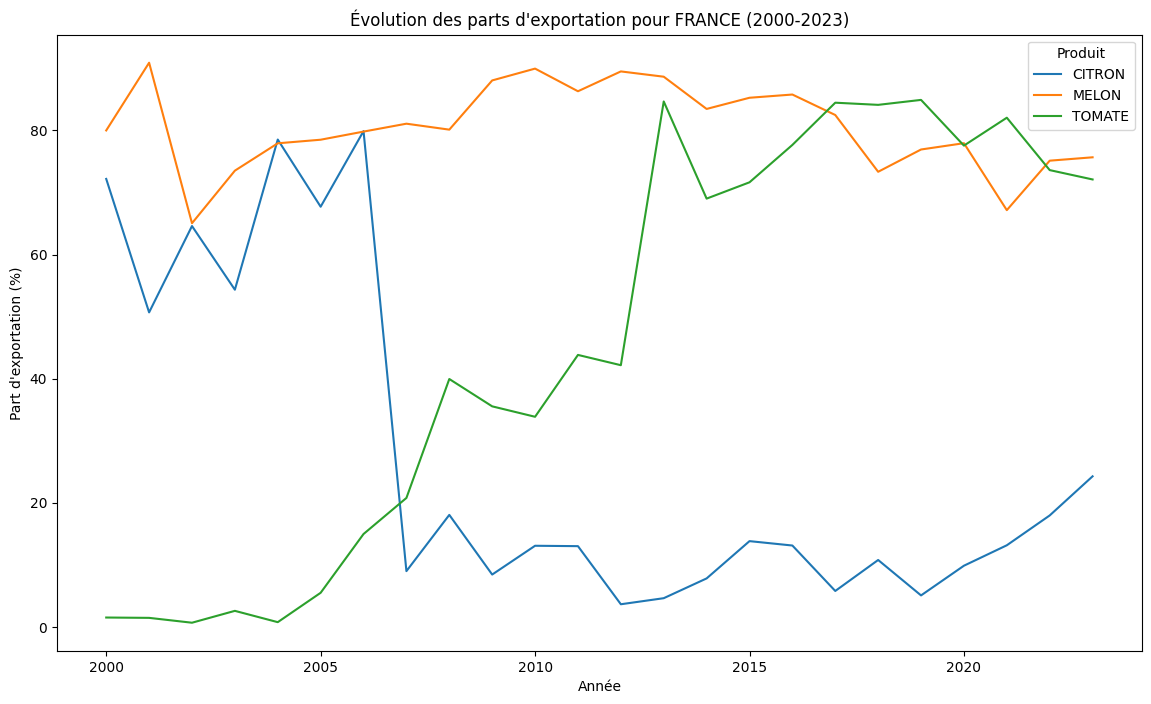

In [7]:
# Filter data for a specific country
example_country = 'FRANCE'  # Replace with a country of your choice

# Initialize a figure
plt.figure(figsize=(14, 8))

# Loop for each product
for product in filtered_countries['produit'].unique():
    country_product_data = filtered_countries[(filtered_countries['pays'] == example_country) & (filtered_countries['produit'] == product)]
    
    if not country_product_data.empty:
        # Extract years and values
        years = list(range(2000, 2024))
        values = [country_product_data[f'valeur_{year}'].values[0] if f'valeur_{year}' in country_product_data else 0 for year in years]
        plt.plot(years, values, label=product)

plt.xlabel('Year')
plt.ylabel('Export share (%)')
plt.title(f'Trend of export shares for {example_country} (2000-2023)')
plt.legend(title='Product')
plt.show()


In [15]:
# Example visualization for export shares by product and country
def plot_export_share_by_country(product, country):
    product_data = filtered_countries[(filtered_countries['produit'] == product) & (filtered_countries['pays'] == country)]
    years = [f'valeur_{year}' for year in range(2000, 2024)]
    
    # Check that the years exist in the DataFrame
    available_years = [year for year in years if year in product_data.columns]
    values = product_data[available_years].values.flatten()
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(2000, 2000 + len(values)), values, marker='o')
    plt.title(f'Export shares of {product} to {country} (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Export share (%)')
    plt.grid(True)
    plt.show()


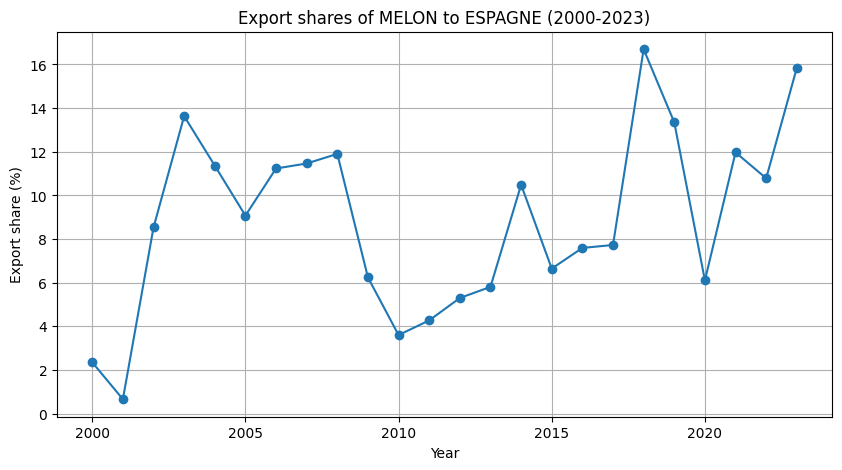

In [16]:
# Example usage of the visualization functions
plot_export_share_by_country('MELON', 'ESPAGNE')


In [20]:
def plot_export_share_heatmap(product):
    # Filter data for a specific product
    heatmap_data = filtered_countries[filtered_countries['produit'] == product]
    heatmap_data = heatmap_data.set_index('pays')
    heatmap_data = heatmap_data[[f'valeur_{year}' for year in range(2000, 2024)]]
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
    plt.title(f'Heatmap of export shares for {product} (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.show()

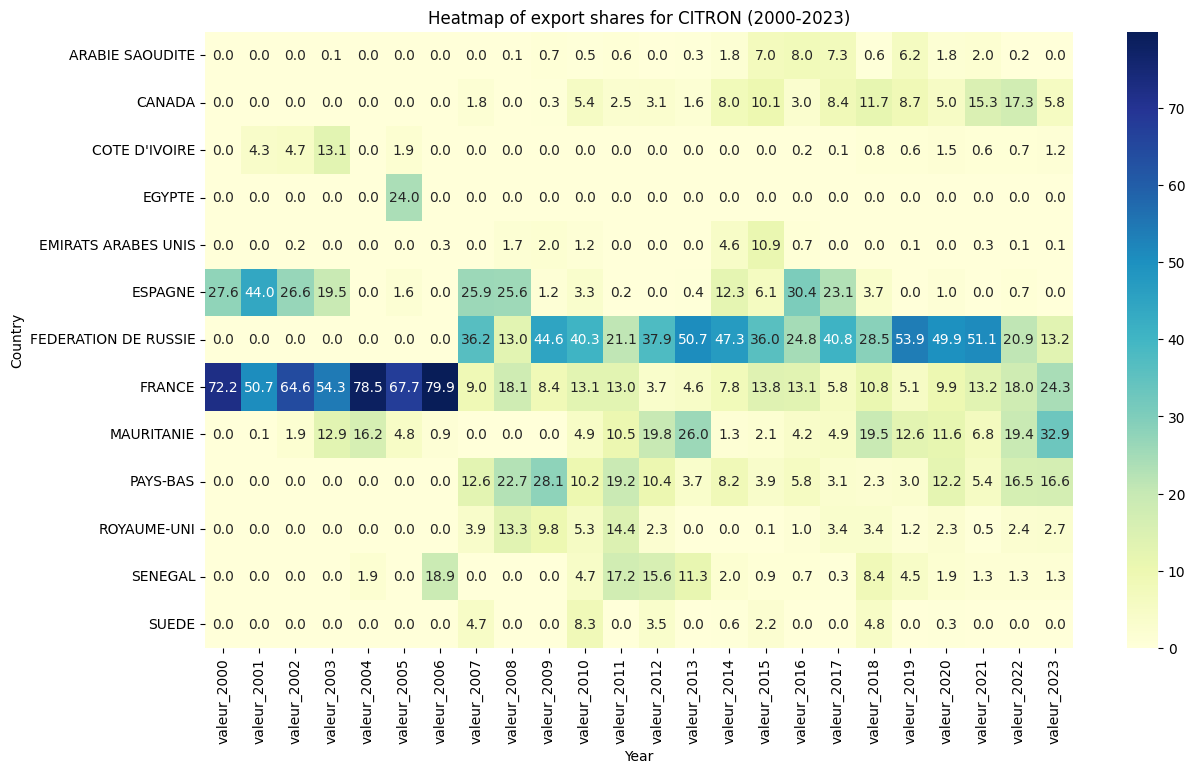

In [21]:
plot_export_share_heatmap('CITRON')

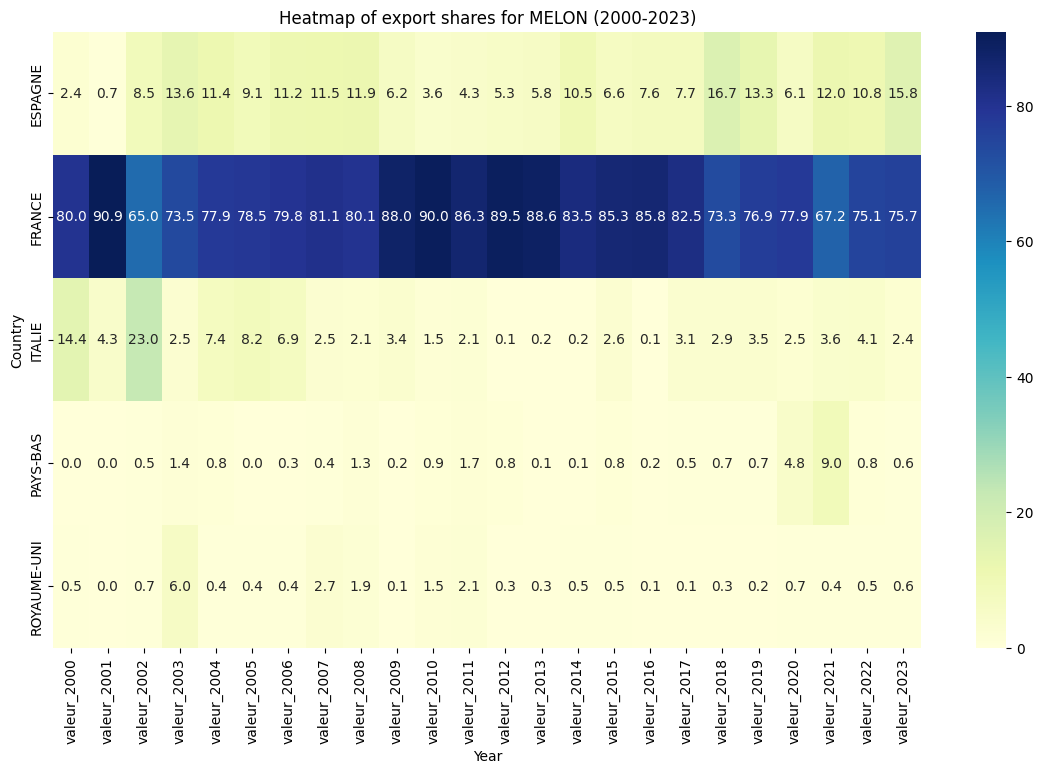

In [22]:
plot_export_share_heatmap('MELON')

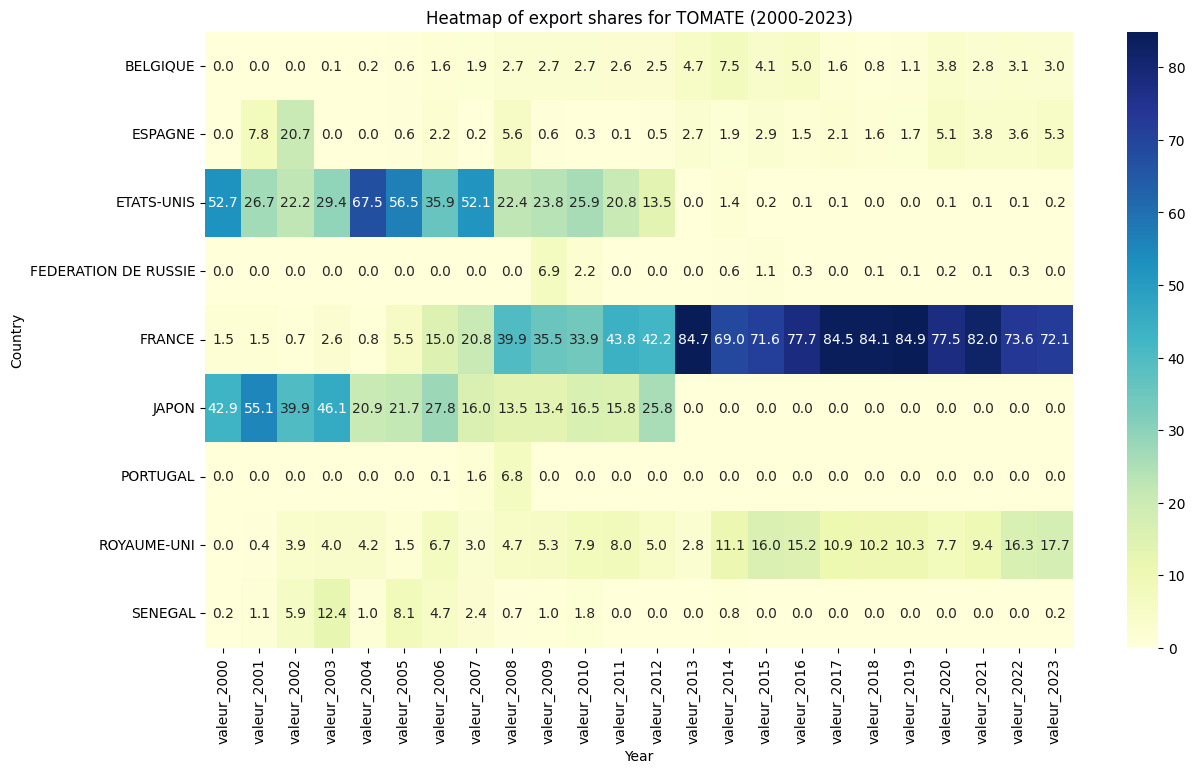

In [23]:
plot_export_share_heatmap('TOMATE')

In [24]:
data_without_Countries = pd.read_csv("Data_intermediate\exports_without_Countries.csv", delimiter=',')

This script contains functions to plot export values and export weights for a specific product over the years 2000 to 2023.
You can use these functions to visualize the trends in export data for different products.

Functions:
1. plot_export_values(product): Plots the export values for the given product.
2. plot_export_weights(product): Plots the export weights for the given product.

In [25]:
# Function to plot export values by product
def plot_export_values(product):
    product_data = data_without_Countries[data_without_Countries['produit'] == product]
    years = [str(year) for year in range(2000, 2024)]
    values = product_data[[f'valeur_{year}' for year in range(2000, 2023+1)]].values.flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(years, values, marker='o', label=product)
    plt.title(f"Export values of {product} (2000-2023)")
    plt.xlabel("Year")
    plt.ylabel("Export value")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to plot export weights by product
def plot_export_weights(product):
    product_data = data_without_Countries[data_without_Countries['produit'] == product]
    years = [str(year) for year in range(2000, 2024)]
    weights = product_data[[f'poids_{year}' for year in range(2000, 2023+1)]].values.flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(years, weights, marker='o', label=product)
    plt.title(f"Export weights of {product} (2000-2023)")
    plt.xlabel("Year")
    plt.ylabel("Export weight")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

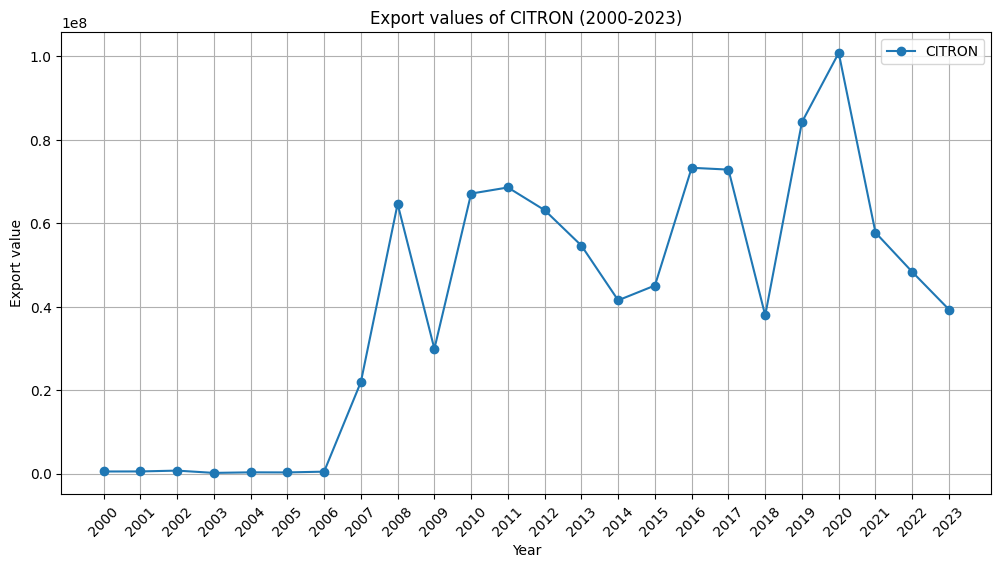

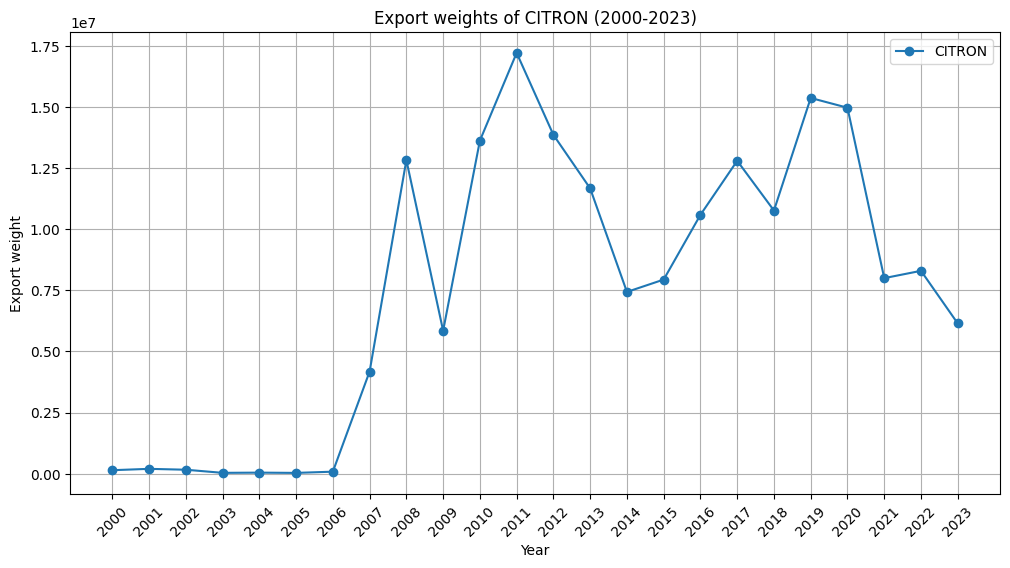

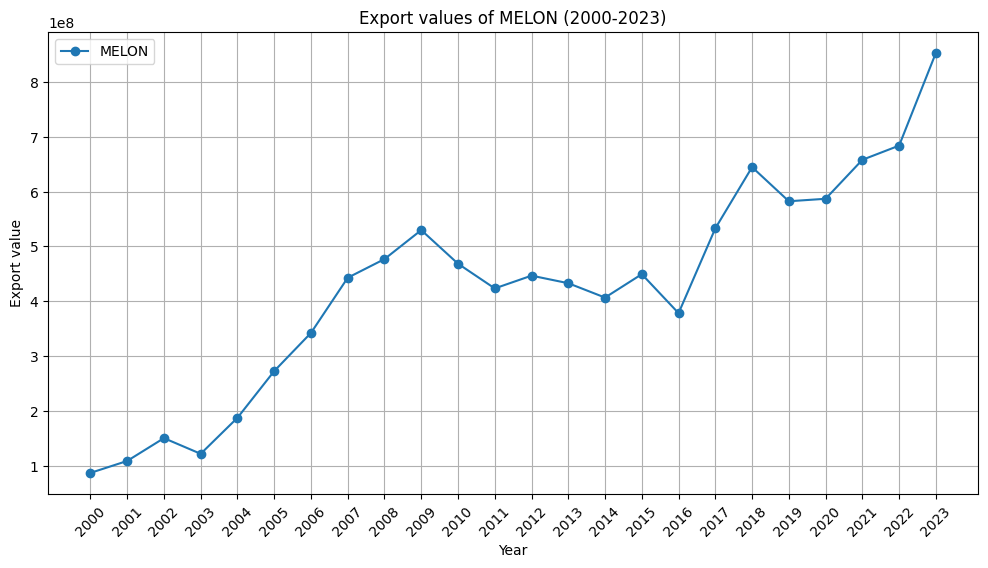

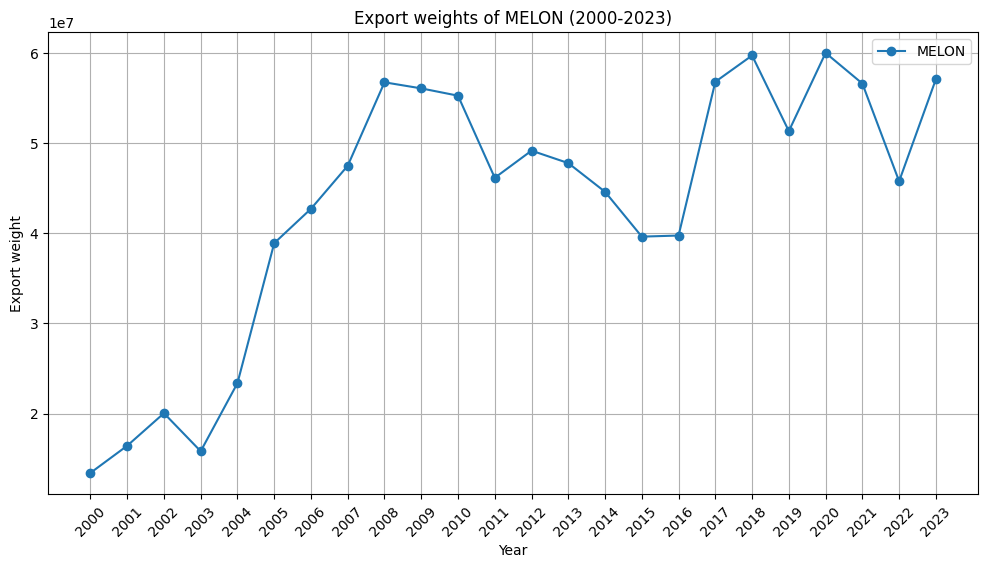

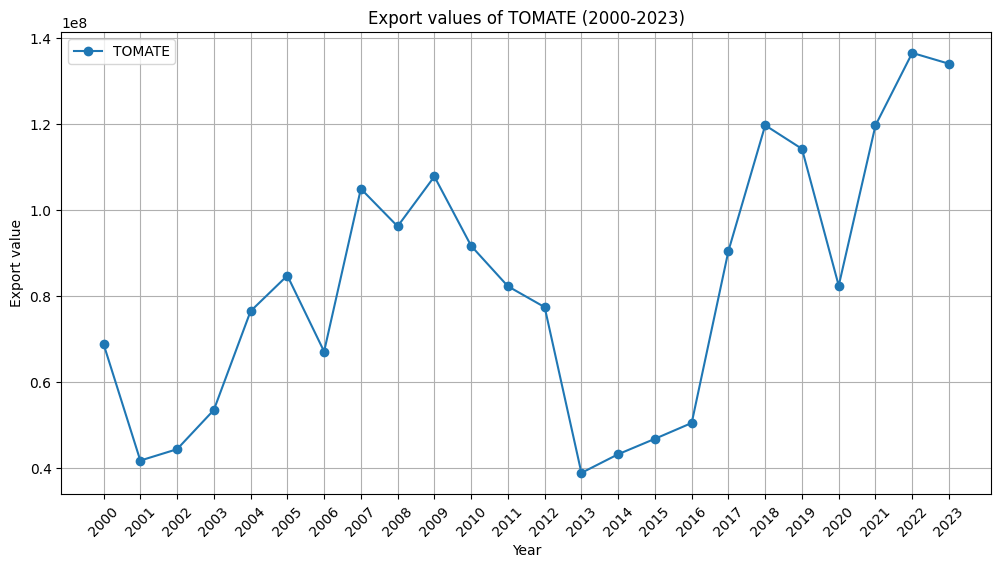

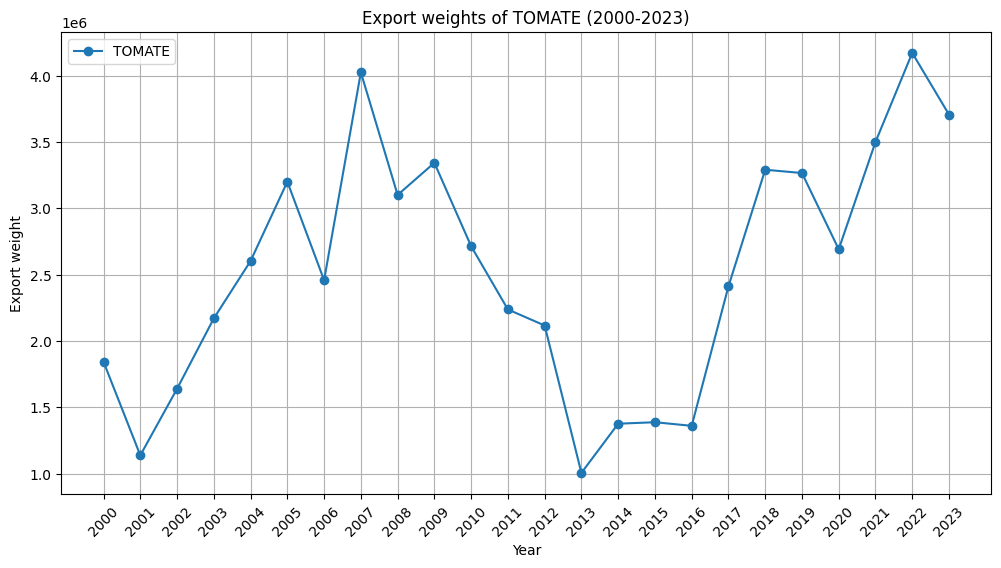

In [27]:

plot_export_values('CITRON')
plot_export_weights('CITRON')

plot_export_values('MELON')
plot_export_weights('MELON')

plot_export_values('TOMATE')
plot_export_weights('TOMATE')

In [28]:
data_continent = pd.read_csv("Data_intermediate\exports_continent.csv", delimiter=',')

In [29]:
data_continent.head()

    

,produit,Continent,valeur_2000,valeur_2001,valeur_2002,valeur_2003,valeur_2004,valeur_2005,valeur_2006,valeur_2007,...,poids_2014,poids_2015,poids_2016,poids_2017,poids_2018,poids_2019,poids_2020,poids_2021,poids_2022,poids_2023
0,CITRON,AFRIQUE,0,22000,46535,39250,51755,80992,89458,0,...,765910.61,817483.0,1811274.6,1762445.52,5660018.0,7129230.61,5785634.000,1975092.00,2779827.0,3011965.00
1,CITRON,AMERIQUE,0,84,0,0,0,0,0,405000,...,630148.00,856047.2,306481.0,786485.00,1414780.0,1265108.00,688382.775,901800.00,1819098.0,601719.00
2,CITRON,ASIE,0,0,1263,180,0,0,1300,0,...,569240.00,1173574.0,1255387.0,1238677.00,57232.0,931301.40,418249.225,238483.27,28177.3,4902.60
3,CITRON,AUSTRALIE,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.000,0.00,0.0,72.00
4,CITRON,AUTRE,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.00,0.0,14715.00,0.000,0.00,58.5,419.65


It includes steps to reshape the data for better readability and functions to create various visualizations.

Steps:
1. Extract years from columns.
2. Convert years to a more readable format.
3. Create visualizations including a line plot and a bar plot.

Functions:
1. plot_visualizations(data): Creates and displays various visualizations based on the provided data.

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benzh\AppData\Local\Temp\ipykernel_16240\2132731822.py:7: SyntaxWarning: invalid escape sequence '\d'
  data_continent_long['Year'] = data_continent_long['Year'].str.extract('(\d+)').astype(int)


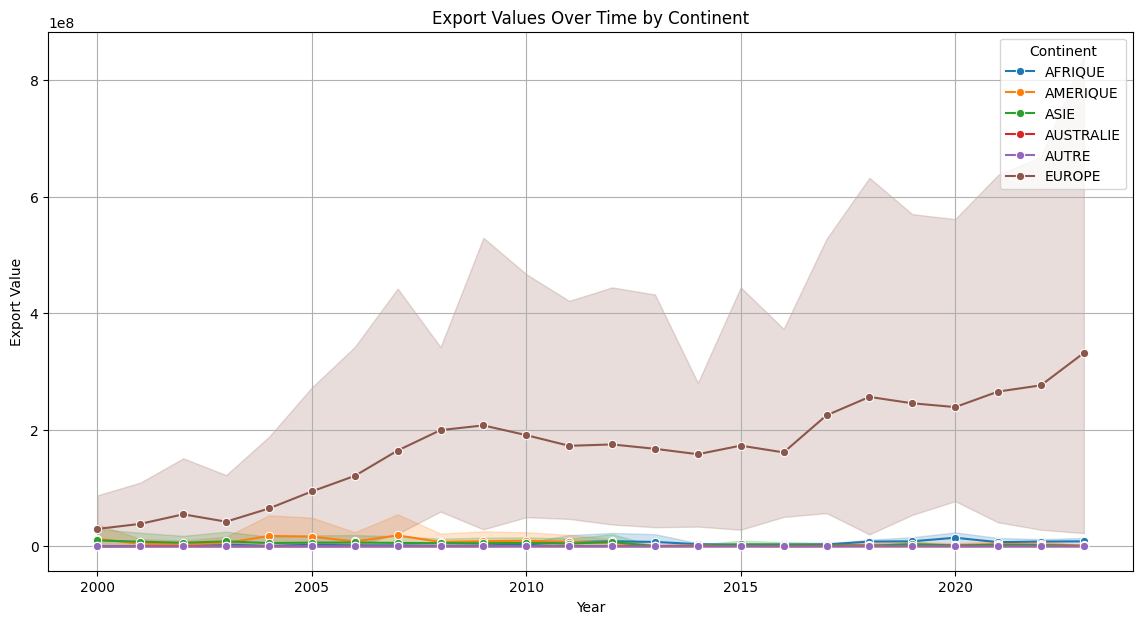

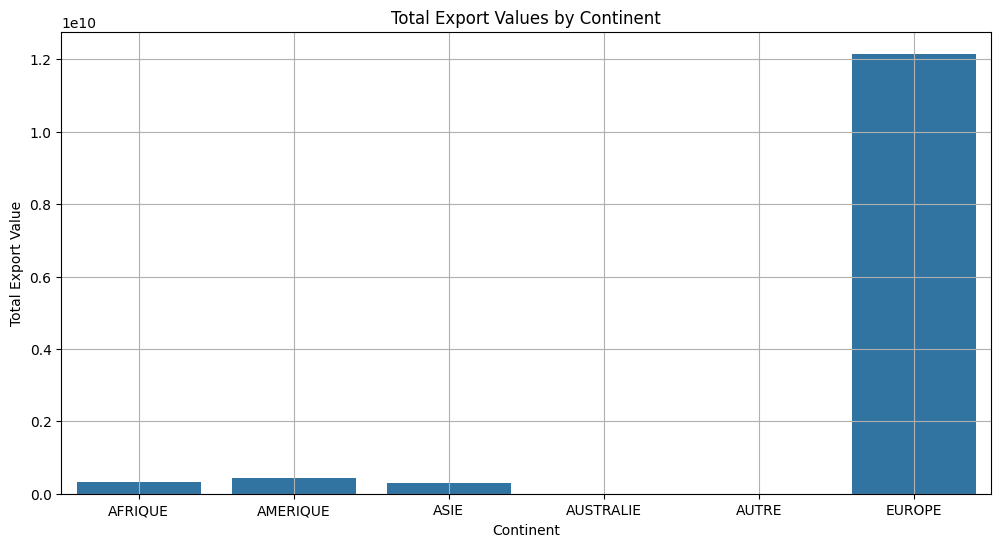

In [32]:
# Extract years from columns
years = [col for col in data_continent.columns if col.startswith('valeur_')]

# Convert years to a more readable format
data_continent_long = pd.melt(data_continent, id_vars=['produit', 'Continent'], value_vars=years,
                              var_name='Year', value_name='Value')
data_continent_long['Year'] = data_continent_long['Year'].str.extract('(\d+)').astype(int)

# Function to plot various visualizations
def plot_visualizations(data):
    # Line Plot of Export Values Over Time for Each Continent
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=data, x='Year', y='Value', hue='Continent', marker='o')
    plt.title('Export Values Over Time by Continent')
    plt.xlabel('Year')
    plt.ylabel('Export Value')
    plt.grid(True)
    plt.show()
    
    # Bar Plot of Total Export Values by Continent
    total_exports = data.groupby('Continent')['Value'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=total_exports, x='Continent', y='Value')
    plt.title('Total Export Values by Continent')
    plt.xlabel('Continent')
    plt.ylabel('Total Export Value')
    plt.grid(True)
    plt.show()

# Call the function to plot the visualizations
plot_visualizations(data_continent_long)


This script processes export data to calculate the percentage of exports for each continent by year and product.
It includes steps to reshape the data, calculate total exports, and compute export percentages.

Steps:
1. Extract years from columns.
2. Convert years to a more readable format.
3. Calculate total export values for each year and product.
4. Merge total export values back into the original data.
5. Calculate the export percentage for each continent.
6. Select and display the required columns.


In [37]:


# Extract years from columns
years = [col for col in data_continent.columns if col.startswith('valeur_')]

# Convert years to a more readable format
data_continent_long = pd.melt(data_continent, id_vars=['produit', 'Continent'], value_vars=years,
                              var_name='Year', value_name='Value')
data_continent_long['Year'] = data_continent_long['Year'].str.extract('(\d+)').astype(int)

# Calculate the total export values for each year and product
total_exports = data_continent_long.groupby(['produit', 'Year'])['Value'].sum().reset_index()
total_exports.columns = ['produit', 'Year', 'Total_Value']

# Merge to get the total exports for each record
data_continent_long = pd.merge(data_continent_long, total_exports, on=['produit', 'Year'])

# Calculate the export percentage for each continent
data_continent_long['Percentage'] = (data_continent_long['Value'] / data_continent_long['Total_Value']) * 100

# Select the required columns
data_percentage = data_continent_long[['Continent', 'produit', 'Year', 'Percentage']]

# Display the first few rows of the resulting DataFrame
print(data_percentage.head())


   Continent produit  Year  Percentage
0    AFRIQUE  CITRON  2000         0.0
1   AMERIQUE  CITRON  2000         0.0
2       ASIE  CITRON  2000         0.0
3  AUSTRALIE  CITRON  2000         0.0
4      AUTRE  CITRON  2000         0.0


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benzh\AppData\Local\Temp\ipykernel_16240\2193418334.py:9: SyntaxWarning: invalid escape sequence '\d'
  data_continent_long['Year'] = data_continent_long['Year'].str.extract('(\d+)').astype(int)


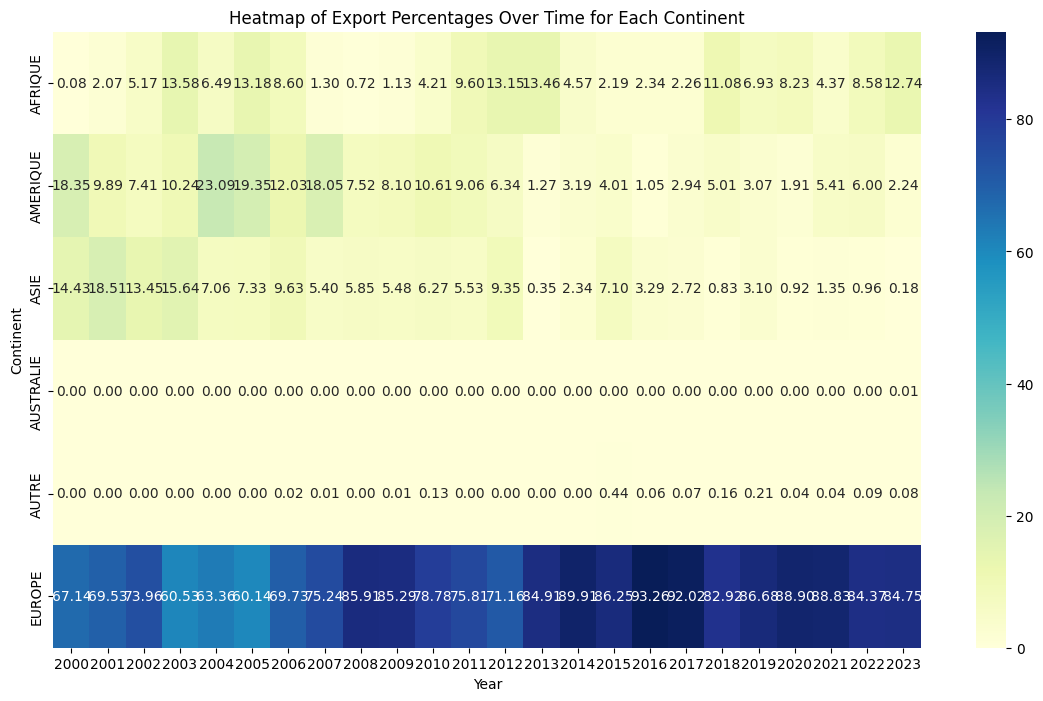

In [38]:
# Heatmap of Export Percentages Over Time for each Continent and Product
plt.figure(figsize=(14, 8))
heatmap_data = data_pourcentage.pivot_table(index='Continent', columns='Année', values='Pourcentage', aggfunc='mean').fillna(0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of Export Percentages Over Time for Each Continent')
plt.xlabel('Year')
plt.ylabel('Continent')
plt.show()

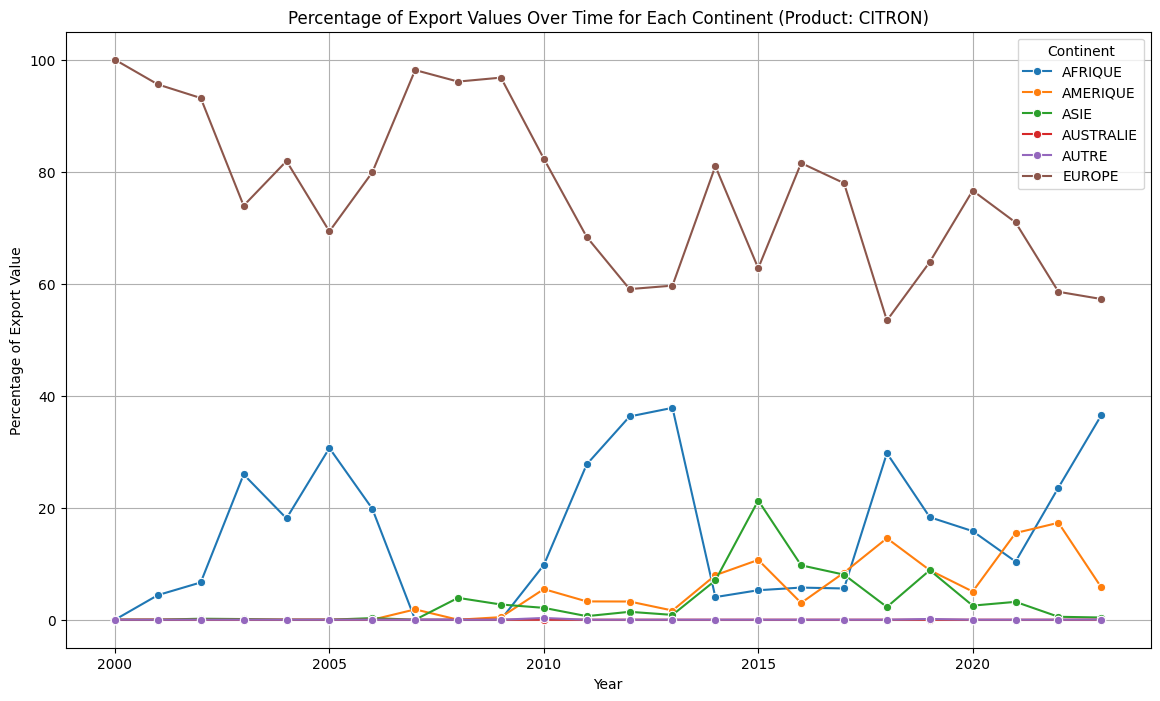

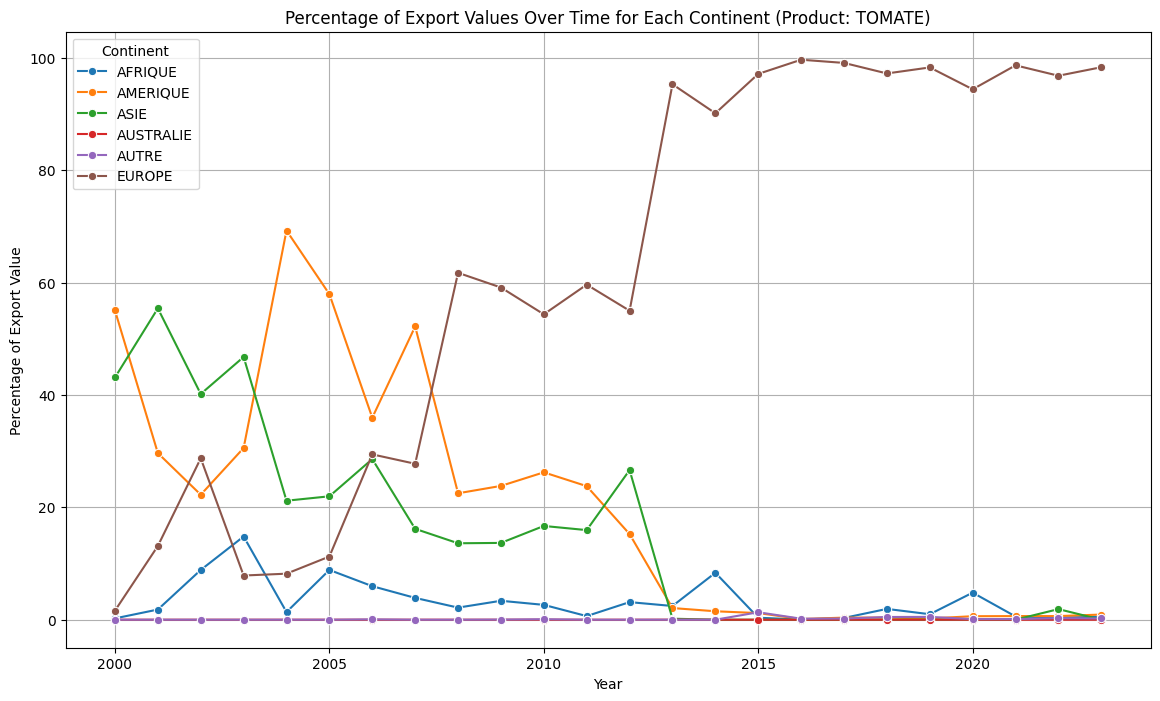

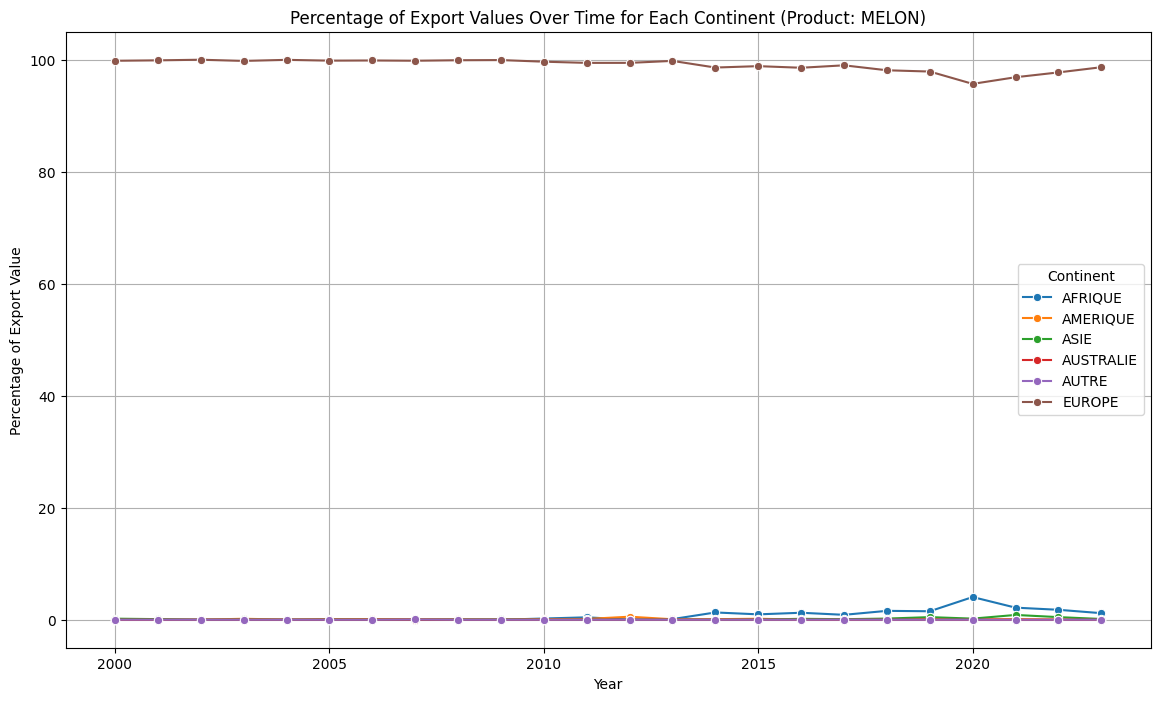

In [39]:
# Time Series Plot of Export Percentages Over Time for Each Product and Continent
products = data_pourcentage['produit'].unique()

for product in products:
    plt.figure(figsize=(14, 8))
    product_data = data_pourcentage[data_pourcentage['produit'] == product]
    sns.lineplot(data=product_data, x='Année', y='Pourcentage', hue='Continent', marker='o')
    plt.title(f'Percentage of Export Values Over Time for Each Continent (Product: {product})')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Export Value')
    plt.legend(title='Continent')
    plt.grid(True)
    plt.show()
